<a href="https://www.kaggle.com/code/nainapandey96/cifar-10-ann-cnn-compare?scriptVersionId=95043163" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape
#so here 50k is dataset size , 32*32 is image size and 3 is rgb(z dim)

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
#we will write function to plot 
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

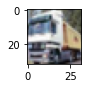

In [6]:
plot_sample(1)

In [7]:
#We will scale the images now since scaling help model to perform better.
#For scaling we will simply divide the samples by 255. rgb max value is 255
#The shape will remain same but now values will be between 0 and 1
x_train_scaled= X_train/255
x_test_scaled=X_test/255

In [8]:
#We will do one hot encoding by using keras .utils
y_train_categorical= keras.utils.to_categorical( y_train, num_classes=10, dtype='float32')
y_test_categorical= keras.utils.to_categorical( y_test, num_classes=10, dtype='float32')

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
#now we build model
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    #we will use 10 neurons cuz of 10 classes
    keras.layers.Dense(10, activation='sigmoid')#sigmoid is good with classification
])

model.compile(optimizer='SGD',
             loss='categorical_crossentropy', #we are using one hot encoding in y_train thats y we are using this loss if we had y_train in original then sparse
             metrics=['accuracy'])
model.fit(x_train_scaled,y_train_categorical, epochs=10)

2022-05-08 06:21:40.615189: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-08 06:21:40.730745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-08 06:21:40.731528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-08 06:21:40.732679: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8134 - accuracy: 0.3542
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6244 - accuracy: 0.4276
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5438 - accuracy: 0.4549
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4831 - accuracy: 0.4765
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4340 - accuracy: 0.4947
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3896 - accuracy: 0.5126
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3513 - accuracy: 0.5238
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3189 - accuracy: 0.5361
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.2836 - accuracy: 0.5499
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.249

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[np.argmax(model.predict(x_test_scaled)[2])]

'truck'

In [11]:
classes[y_test[2][0]]

'ship'

In [12]:
y_train= y_train.reshape(-1,)
y_test=y_test.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [13]:
# We will make basic CNN 
cnn= keras.Sequential([
    #cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    #we will use 10 neurons cuz of 10 classes
    keras.layers.Dense(10, activation='softmax')#softmax normalize the prob
])

cnn.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy', #we are using one hot encoding in y_train thats y we are using this loss if we had y_train in original then sparse
             metrics=['accuracy'])
cnn.fit(x_train_scaled,y_train, epochs=10)

Epoch 1/10


2022-05-08 06:22:33.040192: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 [==============================] - 10s 3ms/step - loss: 1.9937 - accuracy: 0.2834
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6042 - accuracy: 0.4236
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4332 - accuracy: 0.4892
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3273 - accuracy: 0.5308
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2387 - accuracy: 0.5641
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1692 - accuracy: 0.5898
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1096 - accuracy: 0.6142
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0569 - accuracy: 0.6318
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0109 - accuracy: 0.6478
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9696 - accura

In [14]:
#Lets try it with adam optimizer
cnn= keras.Sequential([
    #cnn
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    
    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    #we will use 10 neurons cuz of 10 classes
    keras.layers.Dense(10, activation='softmax')#softmax normalize the prob
])

cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])
cnn.fit(x_train_scaled,y_train, epochs=15)
cnn.evaluate(x_test_scaled,y_test)

Epoch 1/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4852 - accuracy: 0.4648
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1559 - accuracy: 0.5916
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0316 - accuracy: 0.6401
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9470 - accuracy: 0.6716
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8872 - accuracy: 0.6923
Epoch 6/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8357 - accuracy: 0.7105
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7906 - accuracy: 0.7260
Epoch 8/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7525 - accuracy: 0.7403
Epoch 9/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7106 - accuracy: 0.7556
Epoch 10/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.681

[0.9753842949867249, 0.6945000290870667]

We tried to use different optimizer to check the accuracy
sgd- 66% , TEST- 63%
adam- 76%  test- 68%
RMSProp- 81% test-69%
Nadam-80%  test-70%

69% is most any optimizer is giving us we will go with adam


In [15]:
y_pred = cnn.predict(x_test_scaled)

In [16]:
y_pred[:5]

array([[3.4697463e-05, 2.5406821e-06, 3.1318833e-04, 9.7818178e-01,
        4.9688835e-05, 1.9265573e-02, 1.9420814e-03, 1.5051328e-05,
        1.9403864e-04, 1.4543388e-06],
       [1.0883472e-02, 1.3497138e-01, 1.8964381e-07, 1.8143020e-08,
        1.0347004e-09, 2.1965470e-10, 4.4719457e-11, 2.0765256e-10,
        8.5411590e-01, 2.8987308e-05],
       [2.5357503e-02, 2.6552826e-01, 1.9113212e-03, 3.9174519e-03,
        7.3465104e-05, 1.9090940e-04, 1.4577490e-04, 7.9854473e-04,
        6.9734234e-01, 4.7343611e-03],
       [8.8147295e-01, 1.2615847e-03, 9.4557561e-02, 4.8016343e-05,
        6.4729713e-04, 2.9482605e-06, 2.2589831e-05, 8.9901996e-06,
        2.1977512e-02, 4.9528688e-07],
       [5.3652735e-07, 1.1088055e-07, 5.9565082e-03, 1.6734613e-02,
        4.0839259e-02, 1.3340411e-03, 9.3512720e-01, 1.5043328e-07,
        7.4921795e-06, 4.6136851e-08]], dtype=float32)

In [17]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [18]:
for i in range(0,10):
    print(classes[y_classes[i]])

cat
ship
ship
airplane
frog
frog
automobile
frog
cat
automobile


In [19]:
for i in range(0,10):
    print(classes[y_test[i]])

cat
ship
ship
airplane
frog
frog
automobile
frog
cat
automobile


Nearly 69 % accuracy is working good compared to ANN 